<a href="https://colab.research.google.com/github/pragenius/AI_ML_IITH23/blob/main/CNNPractice_04Oct2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing opencv, numpy and matplotlib packages
import cv2
import numpy as np
import matplotlib.pyplot as plt

#importing pytorch packages
import torch
from torch.nn import Conv2d

In [ ]:
def apply_conv(image,kernel,padding=0,stride=1):
  image=torch.from_numpy(image)
  print(image.shape[0])
  input=image.view(1,1,image.shape[0],image.shape[1])

  kernel=torch.from_numpy(kernel.astype(np.float32))
  kernel=kernel.view(1,1,kernel.shape[0],kernel.shape[1])
  conv=Conv2d(in_channels=1,out_channels=1,kernel_size=kernel.shape,padding=padding,stride=stride)

  conv.weight=torch.nn.Parameter(kernel)

  output=conv(input.float())

  output_img=output.data.numpy()

  output_img=output_img.reshape((-1,output_img.shape[-1]))

  return output_img

In [ ]:
image=cv2.imread('/content/img2.jpeg',0)

conv_filter_avg=np.array([[1,1,1],
                         [1,1,1],
                         [1,1,1]])/3
conv_filter_avg

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333]])

In [ ]:
out1=apply_conv(image,conv_filter_avg,padding=0,stride=1)

118


In [ ]:

out1.shape

(116, 182)

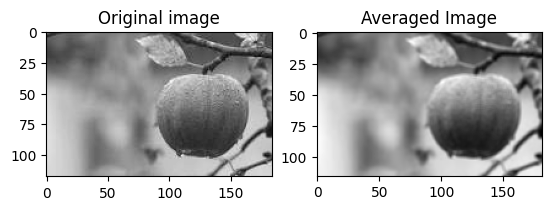

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(1,2,1)
ax.imshow(image,cmap='gray')
ax.set_title('Original image')
ax=fig.add_subplot(1,2,2)
ax.imshow(out1,cmap='gray')
ax.set_title('Averaged Image')
plt.show()

In [ ]:
image=cv2.imread('/content/img2.jpeg',0)

conv_filter_diag=np.array([[1,1,0],
                         [1,0,-1],
                         [0,-1,-1]])  #for diagonal detection
conv_filter_diag

array([[ 1,  1,  0],
       [ 1,  0, -1],
       [ 0, -1, -1]])

In [ ]:
out1=apply_conv(image,conv_filter_diag,padding=0,stride=1)

118


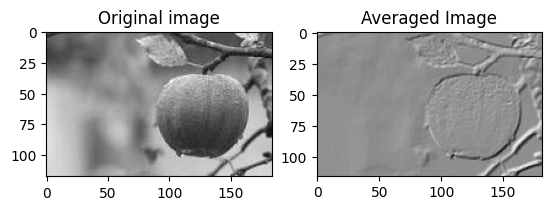

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(1,2,1)
ax.imshow(image,cmap='gray')
ax.set_title('Original image')
ax=fig.add_subplot(1,2,2)
ax.imshow(out1,cmap='gray')
ax.set_title('Averaged Image')
plt.show()

In [12]:
# 06 Oct 2023
# Import packages
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [13]:
#  Images returned from torchvision dataset classes is in range [0,1]
# We transform them to tensors and normalize them to range [-1,1] using 'Normalize' transform

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Classes in CIFAR10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:02<00:00, 80534752.95it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [15]:
print('Training data shape : ', trainset.data.shape, len(trainset.targets))
print('Testing data shape : ', testset.data.shape, len(testset.targets))

# Find the unique numbers from the train labels
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (50000, 32, 32, 3) 50000
Testing data shape :  (10000, 32, 32, 3) 10000
Total number of outputs :  10
Output classes :  ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [16]:
def train(num_epochs, model, train_loader, loss_func, optimizer):

  # Training mode
  model.train()

  train_losses = []
  train_acc = []

  # Train the model
  for epoch in range(num_epochs):
    running_loss = 0
    running_acc = 0
    for i, (images, labels) in enumerate(train_loader):

      # clear gradients for this training step
      optimizer.zero_grad()

      # Forward pass
      output = model(images)

      # Calculate loss
      loss = loss_func(output, labels)

      # Backpropagation, compute gradients
      loss.backward()

      # Apply gradients
      optimizer.step()

      # Running loss
      running_loss += loss.item()

      # indices of max probabilities
      _, preds = torch.max(output, dim=1)

      # Calculate number of correct predictions
      correct = (preds.float() == labels).sum()
      running_acc += correct

      # Average loss and acc values
      epoch_loss = running_loss / len(train_loader.dataset)
      epoch_acc = running_acc / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    print ('Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss, epoch_acc*100))

  return train_losses, train_acc

In [17]:
def test_model(model, testloader):
  correct = 0
  total = 0
  # Deactivate autograd engine (don't compute grads since we're not training)
  with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Calculate outputs by running images through the network
        outputs = model(images)
        # The class with the highest value is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

  print('Accuracy of the network: %d %%' % (
      100 * correct / total))

In [18]:
# CNN with 2 CONV layers and 3 FC layers
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 128)
        # output layer 10 classes
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # flatten all dimensions except batch
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [19]:
model = Net()
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [20]:
# Cross Entropy loss for multi-class classification
criterion = nn.CrossEntropyLoss()

In [21]:
# SGD optimizer with momentum
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

In [22]:
num_epochs = 5  # iterations
train_losses, train_acc = train(num_epochs, model, trainloader, criterion, optimizer)

Epoch 1/5, Loss: 0.0133, Accuracy: 37.4400
Epoch 2/5, Loss: 0.0095, Accuracy: 56.5480
Epoch 3/5, Loss: 0.0080, Accuracy: 63.7700
Epoch 4/5, Loss: 0.0069, Accuracy: 69.1160
Epoch 5/5, Loss: 0.0059, Accuracy: 73.5640


NameError: ignored

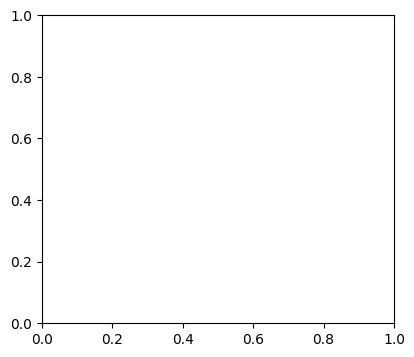

In [10]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(train_losses)+1),train_losses)
plt.xlabel('Training loss')
plt.ylabel('Epochs')
ax.set_title('Loss vs Epochs')
ax = fig.add_subplot(1,2, 2)
ax.plot(np.arange(1,len(train_acc)+1),train_acc)
plt.xlabel('Training accuracy')
plt.ylabel('Epochs')
ax.set_title('Accuracy vs Epochs')
plt.show()

In [11]:
# Accuracy on test data after training
test_model(model, testloader)

NameError: ignored